In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('Levels_Fyi_Salary_Data.csv')
amazon = data[data['company'] == 'Amazon']
amazon = amazon.replace({'level':{'SDE I':'L4','SDE II':'L5','SDE III':'L6','L6 SDM':'L6','6':'L6','L5 SDM':'L5','Principal SDE':'L7','Senior SDE':'L6','5':'L5','7':'L7','4':'L4','1':'L1','l5':'L5','l4':'L4','l6':'L6','l7':'L7','l1':'L1','l2':'L2','l3':'L3','2':'L2','3':'L3'}})
cleaned = amazon.loc[(amazon['level'] == 'L1') | (amazon['level']=='L2') | (amazon['level']=='L3') | (amazon['level']=='L4') | (amazon['level']=='L5') | (amazon['level']=='L6') | (amazon['level']=='L7') | (amazon['level']=='L8')]
cleaned = cleaned.sort_values(by=['level','totalyearlycompensation'], ascending=[False,False])

In [5]:
print("PermaHeadDamage:\n",data['Doctorate_Degree'].value_counts())
print("Masters:\n",data['Masters_Degree'].value_counts())
print("Bachelors:\n",data['Bachelors_Degree'].value_counts())
print("Highschool:\n",data['Highschool'].value_counts())
print("education:\n",data['Education'].value_counts())
fillededu = data[data['Education'].notnull()]
#fillededu.info()
#fillededu['company'].value_counts()
top5 = fillededu[fillededu['company'].isin(['Facebook','Google','Amazon','Apple','Microsoft'])]
#top5.info()
top5['company'].value_counts()


PermaHeadDamage:
 0    60839
1     1803
Name: Doctorate_Degree, dtype: int64
Masters:
 0    47251
1    15391
Name: Masters_Degree, dtype: int64
Bachelors:
 0    50037
1    12605
Name: Bachelors_Degree, dtype: int64
Highschool:
 0    62322
1      320
Name: Highschool, dtype: int64
education:
 Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: Education, dtype: int64


Amazon       3665
Microsoft    2310
Google       1917
Facebook     1431
Apple         915
Name: company, dtype: int64

In [6]:
applemerick = data[(data['company'] == 'Apple')&(data['title']=='Software Engineer')]
amazonIQRcompL4 = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.25)
amazonupperboundcompL4 = cleaned[amazon['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL4)
print(applemerick['level'].value_counts())
applemerick['level']=np.where((applemerick['totalyearlycompensation']<=amazonupperboundcompL4)&(applemerick['level']=='ICT3'),'L4',applemerick['level'])
print(applemerick['level'].value_counts())
applemerick['level']=np.where((applemerick['totalyearlycompensation']>amazonupperboundcompL4)&(applemerick['level']=='ICT3'),'L5',applemerick['level'])
print(applemerick['level'].value_counts())

ICT4                        456
ICT3                        401
ICT2                        114
ICT5                        102
L4                           26
L3                           18
IC2                           5
IC4                           5
L5                            5
L2                            5
ITC4                          4
IC5                           4
ICT6                          4
Senior                        3
Senior Software Engineer      3
IC3                           3
Ict5                          3
ITC3                          2
Software Engineer             2
ict4                          2
ICT 3                         2
ICT 5                         1
E4                            1
Software Integrity Eng 4      1
Ict4                          1
New Grad (ICT2)               1
T3                            1
Director 1                    1
ISE, SIML                     1
l4                            1
Technical Director            1
ECDP    

<ipython-input-6-28dd29579895>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amazonupperboundcompL4 = cleaned[amazon['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL4)
<ipython-input-6-28dd29579895>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  applemerick['level']=np.where((applemerick['totalyearlycompensation']<=amazonupperboundcompL4)&(applemerick['level']=='ICT3'),'L4',applemerick['level'])
<ipython-input-6-28dd29579895>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [7]:
googlejw = data[(data['company'] == 'Google')&(data['title']=='Software Engineer')]
amazonIQRcompL4 = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL5 = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL6 = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL7 = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.25)
amazonIQRcompL8 = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.25)

amazonupperboundcompL4 = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL4)
amazonupperboundcompL5 = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL5)
amazonupperboundcompL6 = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL6)
amazonupperboundcompL7 = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL7)
amazonupperboundcompL8 = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) + (1.5*amazonIQRcompL8)

googlejw = googlejw.replace({'level':{'SWE II':'L3','SWE III':'L4','Senior SWE':'L5','Staff SWE':'L6','Senior Staff SWE':'L7','Principal Engineer':'L8','4':'L4','5':'L5','3':'L3','6':'L6','7':'L7','8':'L8','L3 software engineer':'L3','l3':'L3','l4':'L4','l5':'L5','l6':'L6','l7':'L7','l8':'L8','L3 New Grad':'L3','Manager (L6)':'L6','L6 {Staff)':'L6', 'SWE L5':'L5','Senior L5': 'L5' }})
googlecleaned = googlejw.loc[(googlejw['level'] == 'L3') | (googlejw['level']=='L4') | (googlejw['level']=='L5') | (googlejw['level']=='L6') | (googlejw['level']=='L7') | (googlejw['level']=='L8')]


print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L4a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L5a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())

print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL5)&(googlecleaned['level']=='L4'),'L4a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL5)&(googlecleaned['level']=='L4'),'L5a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())


print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL6)&(googlecleaned['level']=='L5'),'L5a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL6)&(googlecleaned['level']=='L5'),'L6a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())

print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL7)&(googlecleaned['level']=='L6'),'L6a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL7)&(googlecleaned['level']=='L6'),'L7a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())

print(googlecleaned['level'].value_counts())
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL8)&(googlecleaned['level']=='L7'),'L7a',googlecleaned['level'])
googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL8)&(googlecleaned['level']=='L7'),'L8a',googlecleaned['level'])
print(googlecleaned['level'].value_counts())

newcleanedgoogle = googlecleaned.replace({'level':{'L4a':'L4','L5a': 'L5', 'L6a': 'L6', 'L7a': 'L7', 'L8a': 'L8'}})
newgoogleclean = newcleanedgoogle.loc[(newcleanedgoogle['level'] == 'L3') | (newcleanedgoogle['level']=='L4') | (newcleanedgoogle['level']=='L5') | (newcleanedgoogle['level']=='L6') | (newcleanedgoogle['level']=='L7') | (newcleanedgoogle['level']=='L8')]
print(newgoogleclean['level'].value_counts())


L4    1090
L3    1012
L5     619
L6     164
L7      55
L8       8
Name: level, dtype: int64
L4     1090
L4a     910
L5      619
L6      164
L3      102
L7       55
L8        8
Name: level, dtype: int64
L4     1090
L4a     910
L5      619
L6      164
L5a     102
L7       55
L8        8
Name: level, dtype: int64
L4     1090
L4a     910
L5      619
L6      164
L5a     102
L7       55
L8        8
Name: level, dtype: int64
L4a    1938
L5      619
L6      164
L5a     102
L4       62
L7       55
L8        8
Name: level, dtype: int64
L4a    1938
L5      619
L6      164
L5a     164
L7       55
L8        8
Name: level, dtype: int64
L4a    1938
L5      619
L6      164
L5a     164
L7       55
L8        8
Name: level, dtype: int64
L4a    1938
L5a     768
L6      164
L7       55
L5       15
L8        8
Name: level, dtype: int64
L4a    1938
L5a     768
L6      164
L7       55
L6a      15
L8        8
Name: level, dtype: int64
L4a    1938
L5a     768
L6      164
L7       55
L6a      15
L8        8
Name

<ipython-input-7-111235dc1ba6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']<=amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L4a',googlecleaned['level'])
<ipython-input-7-111235dc1ba6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googlecleaned['level']=np.where((googlecleaned['totalyearlycompensation']>amazonupperboundcompL4)&(googlecleaned['level']=='L3'),'L5a',googlecleaned['level'])
<ipython-input-7-111235dc1ba6>:

In [8]:
cleanedL4IQRcomp = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.25)
cleanedL5IQRcomp = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.25)
cleanedL6IQRcomp = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.25)
cleanedL7IQRcomp = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.25)
cleanedL8IQRcomp = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) - cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.25)

cleanedL4upperboundcomp = cleaned[cleaned['level']=='L4'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL4IQRcomp)
cleanedL5upperboundcomp = cleaned[cleaned['level']=='L5'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL5IQRcomp)
cleanedL6upperboundcomp = cleaned[cleaned['level']=='L6'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL6IQRcomp)
cleanedL7upperboundcomp = cleaned[cleaned['level']=='L7'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL7IQRcomp)
cleanedL8upperboundcomp = cleaned[cleaned['level']=='L8'].totalyearlycompensation.quantile(0.75) + (1.5*cleanedL8IQRcomp)


In [9]:
applemerick = data[(data['company'] == 'Apple')&(data['title']=='Software Engineer')]
applemerick = applemerick.replace({'level':{'ict 2':'ICT2','ic2':'ICT2','ICT 2':'ICT2','IC2':'ICT2','New Grad (ICT2)':'ICT3'}})
applemerick = applemerick.replace({'level':{'ict3':'ICT3','ICT 3':'ICT3','IC3':'ICT3','ict3':'ICT3','ic3':'ICT3','ITC3':'ICT3','Ict3':'ICT3','Ic3':'ICT3'}})
applemerick = applemerick.replace({'level':{'ict4':'ICT4','ICT 4':'ICT4','IC4':'ICT4','ict4':'ICT4','ic4':'ICT4','ITC4':'ICT4','Ict4':'ICT4','Ic4':'ICT4','Ict 4':'ICT4','ICT-4':'ICT4','Senior Software Engineer':'ICT4'}})
applemerick = applemerick.replace({'level':{'ict5':'ICT5','ICT 5':'ICT5','IC5':'ICT5','ict5':'ICT5','ic5':'ICT5','ITC5':'ICT5','Ict5':'ICT5','Ic5':'ICT5','Ict 5':'ICT5','ICT-5':'ICT5','ICT - 5':'ICT5'}})
applemerick = applemerick.loc[(applemerick['level'] == 'ICT2') | (applemerick['level']=='ICT3') | (applemerick['level']=='ICT4') | (applemerick['level']=='ICT5')| (applemerick['level']=='ICT6')]

applemerick['level']=np.where(applemerick['level']=='ICT2','L4',applemerick['level'])

applemerick['level']=np.where((applemerick['totalyearlycompensation']<=cleanedL4upperboundcomp)&(applemerick['level']=='ICT3'),'L4',applemerick['level'])
applemerick['level']=np.where((applemerick['totalyearlycompensation']>cleanedL4upperboundcomp)&(applemerick['level']=='ICT3'),'L5',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT4')&(applemerick['totalyearlycompensation']<=cleanedL5upperboundcomp),'L5',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT4')&(applemerick['totalyearlycompensation']>cleanedL5upperboundcomp),'L6',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT5')&(applemerick['totalyearlycompensation']<=cleanedL6upperboundcomp),'L6',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT5')&(applemerick['totalyearlycompensation']>cleanedL6upperboundcomp),'L7',applemerick['level'])

applemerick['level']=np.where((applemerick['level']=='ICT6')&(applemerick['totalyearlycompensation']<=cleanedL7upperboundcomp),'L7',applemerick['level'])
applemerick['level']=np.where((applemerick['level']=='ICT6')&(applemerick['totalyearlycompensation']>cleanedL7upperboundcomp),'L8',applemerick['level'])


In [10]:
facebookcy = data[(data['company']=='Facebook')&(data['title']=='Software Engineer')]


facebookcy = facebookcy.replace({'level':{'3':'E3','5':'E5','e5':'E5','4':'E4','6':'E6'}})
cleanedfacebookcy= facebookcy.loc[(facebookcy['level']=='E3')|(facebookcy['level']=='E4')| (facebookcy['level']=='E5') | (facebookcy['level']=='E6') | (facebookcy['level']=='E7') | (facebookcy['level']=='E8')]

cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E3','L4',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L4',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L5',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL6upperboundcomp)&(cleanedfacebookcy['level']=='E5'),'L5',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL6upperboundcomp)&(cleanedfacebookcy['level']=='E5'),'L6',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL7upperboundcomp)&(cleanedfacebookcy['level']=='E6'),'L6',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL7upperboundcomp)&(cleanedfacebookcy['level']=='E6'),'L7',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL8upperboundcomp)&(cleanedfacebookcy['level']=='E7'),'L7',cleanedfacebookcy['level'])
cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']>cleanedL8upperboundcomp)&(cleanedfacebookcy['level']=='E7'),'L8',cleanedfacebookcy['level'])

cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E8','L8',cleanedfacebookcy['level'])

cleanedfacebookcy['level'].value_counts()

<ipython-input-10-2be6715c939f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedfacebookcy['level']=np.where(cleanedfacebookcy['level']=='E3','L4',cleanedfacebookcy['level'])
<ipython-input-10-2be6715c939f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedfacebookcy['level']=np.where((cleanedfacebookcy['totalyearlycompensation']<=cleanedL5upperboundcomp)&(cleanedfacebookcy['level']=='E4'),'L4',cleanedfacebookcy['level'])
<ipython-input-10-2be6715c939f>:10: SettingWithCopyWarning: 
A value is 

L4    715
L5    607
L6    225
L7     34
L8      4
Name: level, dtype: int64

In [11]:
micromerick=data[(data['company'] == 'Microsoft')&(data['title']=='Software Engineer')]
micromerick=micromerick.replace({'level':{'SDE':'59','L59':'59','SDE 59':'59','sde1':'59','SDE I':'59'}})
micromerick=micromerick.replace({'level':{'l60':'60','L60':'60'}})
micromerick=micromerick.replace({'level':{'l61':'61','L61':'61','SDE II':'61','SDE II (61)':'61','SDE2':'61','sde2':'61','SDE 2':'61','SDE 2 / 61':'61','Sde 2':'61'}})
micromerick=micromerick.replace({'level':{'l62':'62','L62':'62','SDE II (L62)':'62','SDE II L62':'62','SDE II (62)':'62'}})
micromerick=micromerick.replace({'level':{'l63':'63','L63':'63','Senior SDE':'63'}})
micromerick=micromerick.replace({'level':{'l64':'64','L64':'64'}})
micromerick=micromerick.replace({'level':{'l65':'65','L65':'65','Principal SDE':'65'}})
micromerick=micromerick.replace({'level':{'l66':'66','L66':'66'}})
micromerick=micromerick.replace({'level':{'l67':'67','L67':'67'}})
micromerick=micromerick.replace({'level':{'l68':'68','L68':'68'}})
micromerick=micromerick.replace({'level':{'l69':'69','L69':'69'}})
micromerick=micromerick.replace({'level':{'l70':'70','L70':'70','Distinguished Engineer':'70'}})
micromerick=micromerick.replace({'level':{'l80':'80','L80':'80'}})
micromerick=micromerick.loc[(micromerick['level'] == '59') | (micromerick['level']=='60') | (micromerick['level']=='61') | (micromerick['level']=='62') | (micromerick['level']=='63') | (micromerick['level']=='64') | (micromerick['level']=='65') | (micromerick['level']=='66') | (micromerick['level']=='67') | (micromerick['level']=='68') | (micromerick['level']=='69') | (micromerick['level']=='70') | (micromerick['level']=='80')]

micromerick['level']=np.where(micromerick['level']=='59','L4',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='60','L4',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='61')&(micromerick['totalyearlycompensation']<=cleanedL4upperboundcomp),'L4',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='61')&(micromerick['totalyearlycompensation']>cleanedL4upperboundcomp),'L5',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='62','L5',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='63')&(micromerick['totalyearlycompensation']<=cleanedL5upperboundcomp),'L5',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='63')&(micromerick['totalyearlycompensation']>cleanedL5upperboundcomp),'L6',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='64','L6',micromerick['level'])
micromerick['level']=np.where(micromerick['level']=='65','L6',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='66')&(micromerick['totalyearlycompensation']<=cleanedL6upperboundcomp),'L6',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='66')&(micromerick['totalyearlycompensation']>cleanedL6upperboundcomp),'L7',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='67','L7',micromerick['level'])

micromerick['level']=np.where((micromerick['level']=='68')&(micromerick['totalyearlycompensation']<=cleanedL7upperboundcomp),'L7',micromerick['level'])
micromerick['level']=np.where((micromerick['level']=='68')&(micromerick['totalyearlycompensation']>cleanedL7upperboundcomp),'L8',micromerick['level'])

micromerick['level']=np.where(micromerick['level']=='69','L8',micromerick['level'])
micromerick['level']=np.where(micromerick['level']=='70','L8',micromerick['level'])

micromerick['level'].value_counts()

L4    1689
L5    1075
L6     487
L7      35
L8       4
Name: level, dtype: int64

In [12]:
faamg=pd.concat([cleaned,cleanedfacebookcy,newgoogleclean,micromerick,applemerick])
faamg.info()
faamgeduonly=faamg[(faamg['Education'].notna())]
faamgeduonly.info()
faamgeduonly['level'].value_counts()

faamg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16923 entries, 61986 to 62599
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                16923 non-null  object 
 1   company                  16923 non-null  object 
 2   level                    16923 non-null  object 
 3   title                    16923 non-null  object 
 4   totalyearlycompensation  16923 non-null  int64  
 5   location                 16923 non-null  object 
 6   yearsofexperience        16923 non-null  float64
 7   yearsatcompany           16923 non-null  float64
 8   tag                      16548 non-null  object 
 9   basesalary               16923 non-null  float64
 10  stockgrantvalue          16923 non-null  float64
 11  bonus                    16923 non-null  float64
 12  gender                   11862 non-null  object 
 13  otherdetails             9827 non-null   object 
 14  cityid            

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61986,5/14/2021 13:30:43,Amazon,L8,Software Engineering Manager,1660000,"Seattle, WA",15.0,15.0,iOS,160000.0,1500.0,0.0,Male,"Title: Director / Gm, Race: Asian",11527,819.0,69870,0,0,0,0,0,1,0,0,0,0,Asian,NaN
61960,5/11/2019 5:16:48,Amazon,L8,Software Engineering Manager,1400000,"Seattle, WA",30.0,10.0,Distributed Systems (Back-End),160000.0,1200.0,0.0,Male,NaN,11527,819.0,8612,0,0,0,0,0,0,0,0,0,0,NaN,NaN
32237,10/8/2020 22:11:19,Amazon,L8,Software Engineering Manager,1160000,"Seattle, WA",20.0,7.0,Full Stack,160000.0,1000000.0,0.0,NaN,"Title: Director Software Develop,wmr",11527,819.0,44454,0,0,0,0,0,0,0,0,0,0,NaN,NaN
36276,11/30/2020 14:25:44,Amazon,L8,Software Engineering Manager,1000000,"New York, NY",20.0,11.0,Distributed Systems (Back-End),160000.0,840000.0,0.0,Male,"Title: Director, Sdm, Race: White, Academic Le...",10182,501.0,49918,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
60576,8/6/2021 22:06:20,Amazon,L8,Software Engineering Manager,980000,"Seattle, WA",18.0,9.0,Web Development (Front-End),380000.0,510000.0,90000.0,Male,"Title: Software Engineer, Race: Asian, Academi...",11527,819.0,82082,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


<AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>

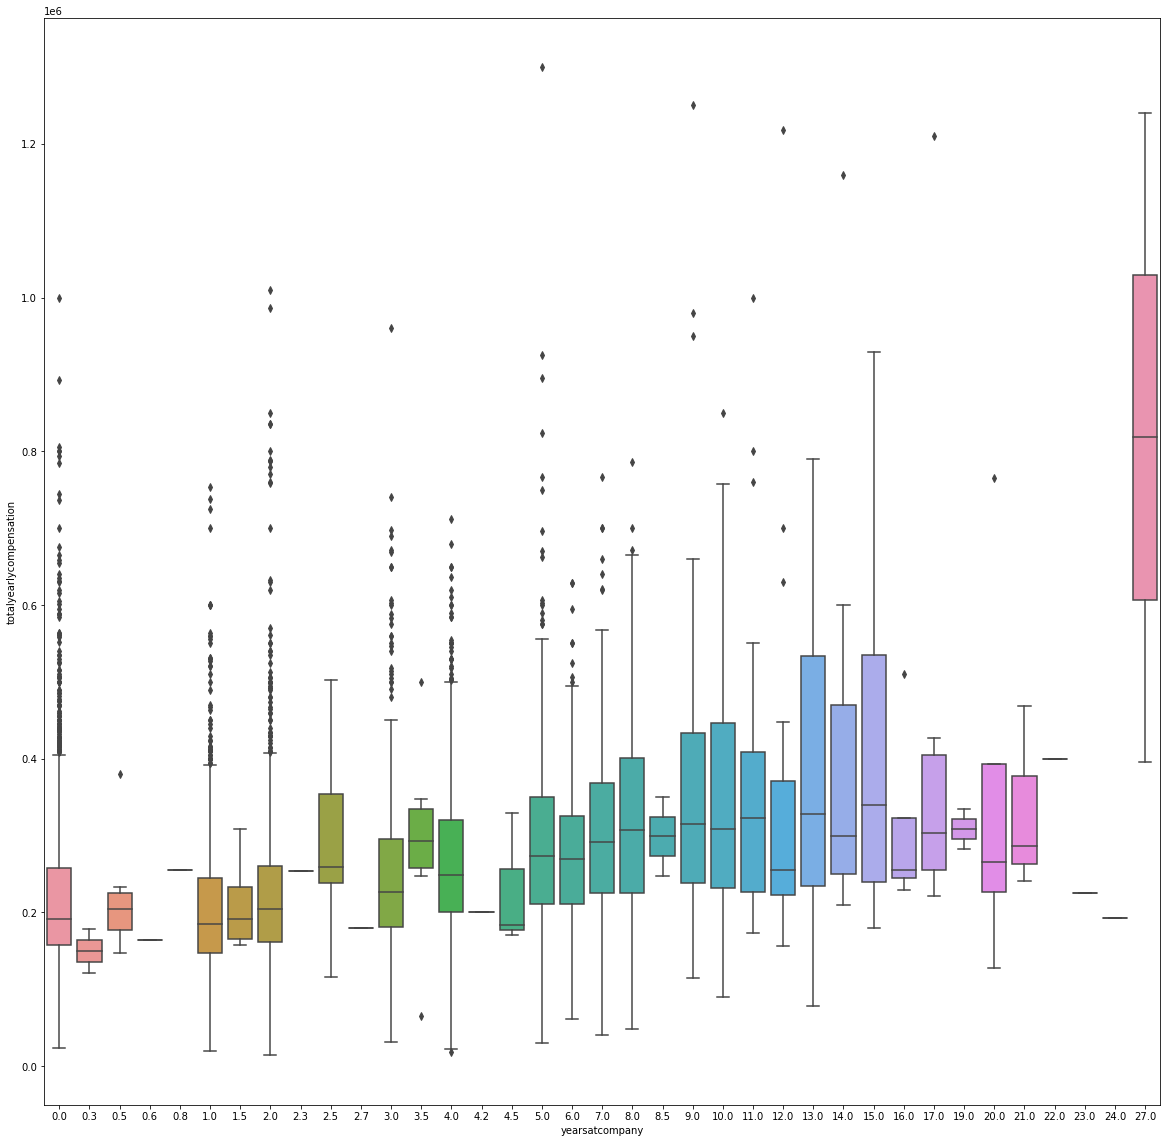

In [13]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data=faamgeduonly,x='yearsatcompany',y='totalyearlycompensation' )






<AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>

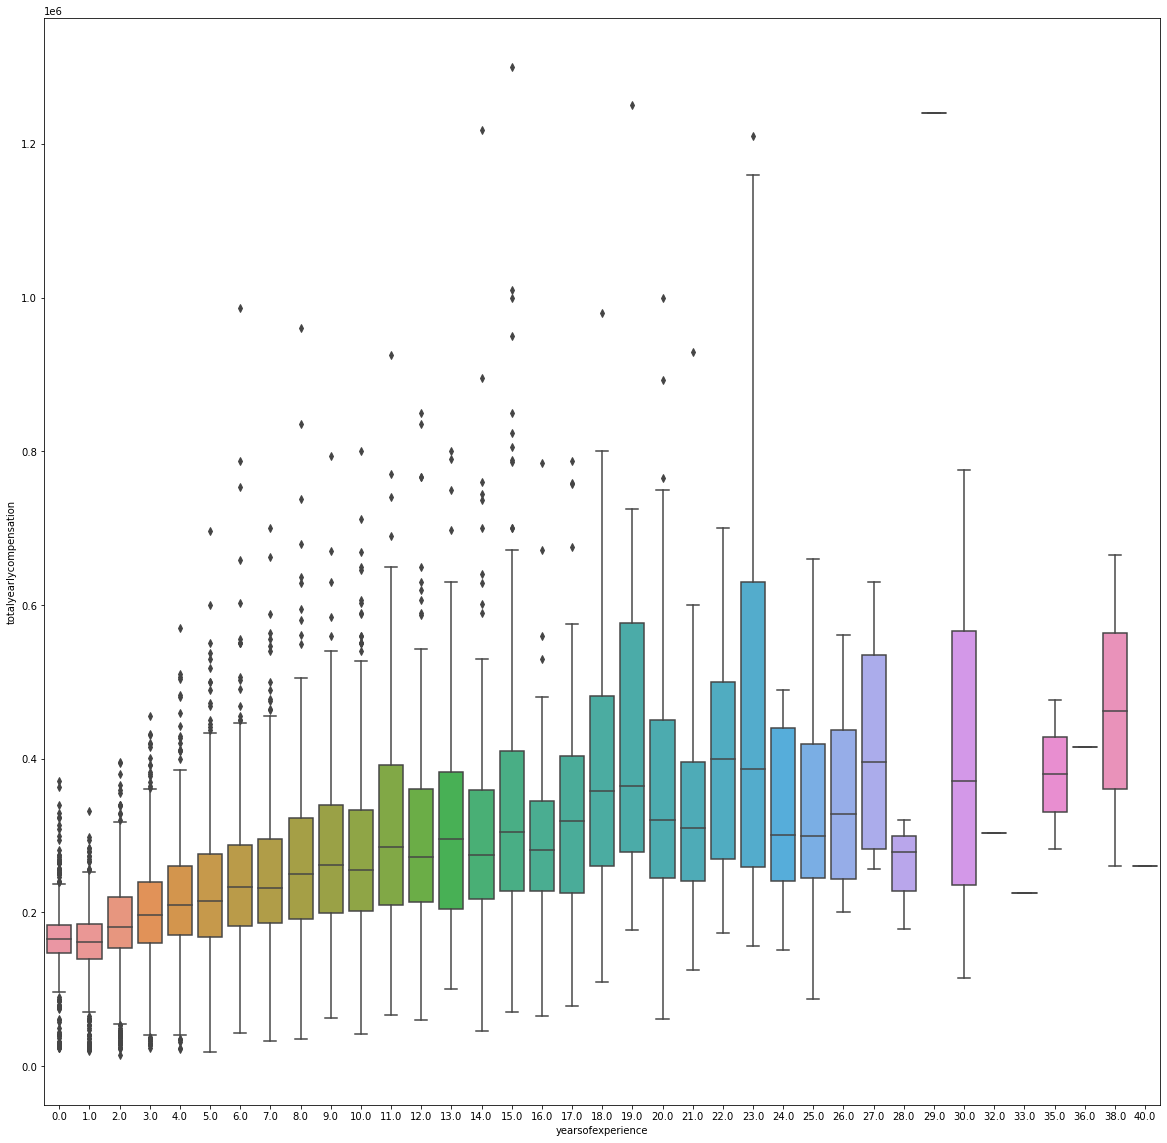

In [14]:
f=plt.figure(figsize=(20,20))
sb.boxplot(data=faamgeduonly, x='yearsofexperience', y='totalyearlycompensation')

Intercept of Regression 	: b=  [206220.17500187]
Coefficients of Regression 	: a=  [[14187.56090521]]



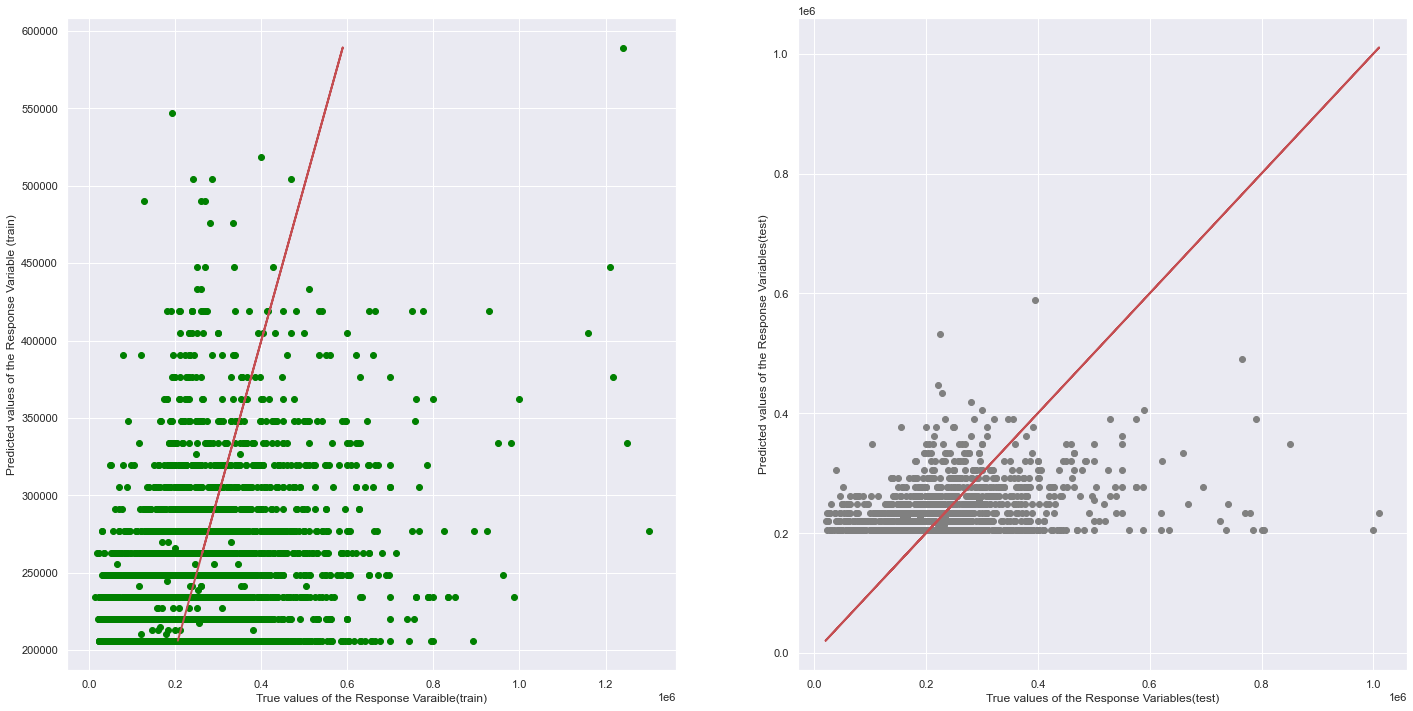

In [37]:
#split the train and test randomly 
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


YearsInCompany= pd.DataFrame(faamgeduonly['yearsatcompany'])
YearlyComp= pd.DataFrame(faamgeduonly['totalyearlycompensation'])
#Split the Dataset into Train:80% and Test:20% 
YearsInComp_train, YearsInComp_test, YearlyComp_train, YearlyComp_test = train_test_split(YearsInCompany, YearlyComp, test_size=0.2)

#Perform linear regression using the train data
lineareg = LinearRegression() #create linear regression obj
lineareg.fit(YearsInComp_train, YearlyComp_train)  #train the linear reg model

#coefficients of the linear regression line
print('Intercept of Regression \t: b= ', lineareg.intercept_)
print('Coefficients of Regression \t: a= ', lineareg.coef_)
print()

#predict saleprice values corresponding to the grlivarea
yearlyTrain_pre= lineareg.predict(YearsInComp_train)
yearlyTest_pre= lineareg.predict(YearsInComp_test)

#plot the regression line 
#Predictions vs the True values 
#training set
f, axes =plt.subplots(1, 2, figsize=(24,12))
axes[0].scatter(YearlyComp_train,yearlyTrain_pre, color= "green")
axes[0].plot(yearlyTrain_pre, yearlyTrain_pre, 'r-', linewidth =2)
axes[0].set_xlabel("True values of the Response Varaible(train)")
axes[0].set_ylabel("Predicted values of the Response Variable (train)")

#test set
axes[1].scatter(YearlyComp_test, yearlyTest_pre, color="grey")
axes[1].plot(YearlyComp_test, YearlyComp_test, 'r-', linewidth= 2)
axes[1].set_xlabel("True values of the Response Variables(test)")
axes[1].set_ylabel("Predicted values of the Response Variables(test)")
plt.show()